In [10]:
using DifferentialEquations
using Plots
using LinearAlgebra
import ForwardDiff
import DiffResults
using AstrodynamicsBase
using Printf
using JSON
using CSV
using DataFrames
using LaTeXStrings
using ColorSchemes
LaTeXStrings

LaTeXStrings

In [2]:
include("../src/SailorMoon.jl")   # relative path to main file of module
param3b = SailorMoon.dynamics_parameters()
paramMulti = SailorMoon.multi_shoot_parameters(param3b)
gr()
fs = 13


┌ Warning: Replacing docs for `Main.SailorMoon.integrate_rk4 :: Union{Tuple{ODEProblem, Real}, Tuple{ODEProblem, Real, Union{Nothing, Vector}}, Tuple{ODEProblem, Real, Union{Nothing, Vector}, Bool}, Tuple{ODEProblem, Real, Union{Nothing, Vector}, Bool, Bool}}` in module `Main.SailorMoon`
└ @ Base.Docs docs\Docs.jl:240


13

In [49]:
filenames = [
    "../run/data/diffcorr_0619_NoThrust2.csv", 
    "../run/data/diffcorr_0618_velThrust.csv",
    "../run/data/diffcorr_0619_EMrotThrust2.csv",
    "../run/data/diffcorr_0618_maxJCThrust2.csv",
    "../run/data/diffcorr_0619_TidalThrust2.csv",
    ]

labels = ["No Thrust", "vel-dir", "EMrot", "max JC", "Tidal"]
# filename5 = "../run/data/diffcorr_0619_EMrotThrust2.csv"

p1 = plot(
    size=(500,500), frame_style=:box, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[50,120],
    xlabel=L"\theta_{m0}, \textrm{rad}", 
    ylabel=L"TOF, days",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs, ylabelfontsize=fs, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-1
);


In [50]:
function interpolatecolor(value, vmin, vmax, cs=:viridis)
    cs = cgrad(cs)
    color = cs[(value - vmin) / (vmax - vmin)]
    return color
end

interpolatecolor (generic function with 2 methods)

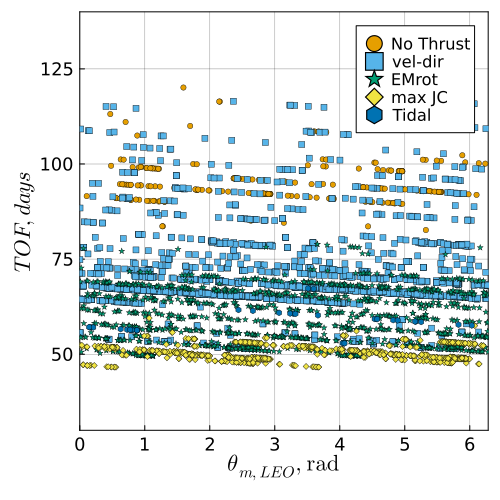

In [51]:
# tof     = df.tof .* param3b.tstar / 86640
# thetasf = df.thetasf
# thetamf = pi .- thetasf
# thetam0 = thetamf .- df.tof .* param3b.oml
# thetam0 = [mod2pi(el) for el in thetam0] 



p = plot(
    size=(500,500), frame_style=:box, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[30,140],
    xlabel=L"\theta_{m,LEO}, \textrm{rad}", 
    ylabel=L"TOF, days",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs+2, ylabelfontsize=fs+2, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-2
);


colors = ["red", "orange", "yellow", "green", "blue", "purple" ]
colors =:okabe_ito  #:tol_bright

markers = [ :circle, :rect, :star5, :diamond, :hexagon];

for (i, fname) in enumerate(filenames)
    df = CSV.read(fname, DataFrame; header=0)
    tof     = df[:,2] .* param3b.tstar ./ 86640
    thetasf = df[:,22+12*paramMulti.n_arc]  # x[19+12*n_arc]
    thetamf = pi .- thetasf
    thetam0 = thetamf .- param3b.oml .* tof
    thetam0 = [mod2pi(el) for el in thetam0]
    
#     scatter!(p, thetam,tof, c=colors[i], markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])
    scatter!(p, thetam0, tof, palette=colors, markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])

#     println(thetam0)

end

plot!(p,legend=:topright)

p




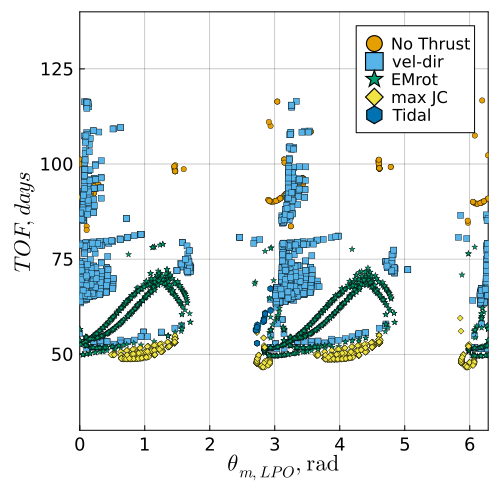

In [52]:

p2 = plot(
    size=(500,500), frame_style=:box, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[30,140],
    xlabel=L"\theta_{m, LPO}, \textrm{rad}", 
    ylabel=L"TOF, days",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs+2, ylabelfontsize=fs+2, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-2
);


colors = ["red", "orange", "yellow", "green", "blue", "purple" ]
colors =:okabe_ito  #:tol_bright
markers = [ :circle, :rect, :star5, :diamond, :hexagon];

for (i, fname) in enumerate(filenames)
    df = CSV.read(fname, DataFrame; header=0)
    tof     = df[:,2] .* param3b.tstar ./ 86640
    thetasf = df[:,22+12*paramMulti.n_arc]  # x[19+12*n_arc]
    thetamf = pi .- thetasf
    thetamf = [mod2pi(el) for el in thetamf]
#     thetam0 = thetamf .- param3b.oml .* tof
#     thetam0 = [mod2pi(el) for el in thetam0]
    
#     scatter!(p2, thetamf, tof, c=colors[i], markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])
    scatter!(p2, thetamf, tof, palette=colors, markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])

#     println(thetam0)

end

plot!(p2,legend=:topright)


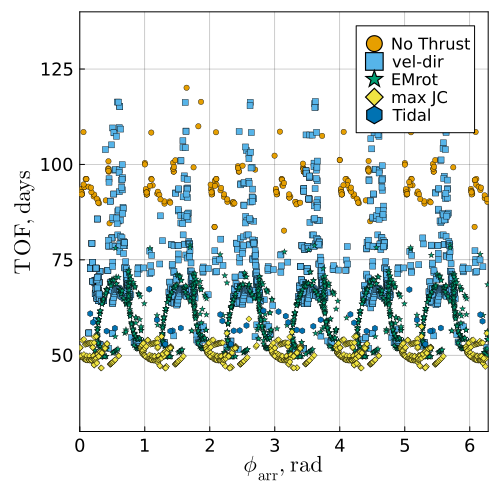

In [53]:

p3 = plot(
    size=(500,500), frame_style=:box, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[30,140],
    xlabel=L"\phi_{\textrm{arr}}, \textrm{rad}", 
    ylabel=L"\textrm{TOF, days}",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs+2, ylabelfontsize=fs+2, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-2
);


colors = ["red", "orange", "yellow", "green", "blue", "purple" ]
colors =:okabe_ito  #:tol_bright
markers = [ :circle, :rect, :star5, :diamond, :hexagon];

for (i, fname) in enumerate(filenames)
    df = CSV.read(fname, DataFrame; header=0)
    tof     = df[:,2] .* param3b.tstar ./ 86640
    phi_LPO = df[:,23+12*paramMulti.n_arc]  # x[19+12*n_arc]
#     thetam0 = thetamf .- param3b.oml .* tof
#     thetam0 = [mod2pi(el) for el in thetam0]
    
#     scatter!(p2, phi_LPO, tof, c=colors[i], markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])
    scatter!(p3, phi_LPO, tof, palette=colors, markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])

#     println(thetam0)

end

plot!(p3,legend=:topright)


In [54]:
savefig(p3, "tof-phi.png")

"C:\\Users\\yujit\\github\\SailorMoon.jl\\tests_yuji\\tof-phi.png"

### save files

In [55]:
savefig(p, "tof-thetam0.png")
savefig(p2, "tof-thetamf.png")

"C:\\Users\\yujit\\github\\SailorMoon.jl\\tests_yuji\\tof-thetamf.png"

In [59]:
l = @layout [a{0.45w} b{0.45w} c{0.05w}]

cs = :viridis
p2 = heatmap(rand(2,2), clims=(rpmin, rpmax),
    framestyle=:none, c=cs, cbar=true, lims=(-1,0), colorbar_title="rp, km",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs, ylabelfontsize=fs, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-1)


plot(p, p1, p2, layout=l, size=(800,500), 
#     top_margin=5Plots.mm,
#     right_margin=5Plots.mm,
#     left_margin=5Plots.mm, 
    bottom_margin=5Plots.mm, 
    title=["SC Vel. dir" "EM rot thrust" ""])


LoadError: UndefVarError: rpmin not defined

In [7]:
for (k,fname) in enumerate(filenames)
    println(fname)
end

../run/data/diffcorr_0619_NoThrust2.csv
../run/data/diffcorr_0619_EMrotThrust2.csv
../run/data/diffcorr_0618_maxJCThrust2.csv
../run/data/diffcorr_0619_TidalThrust2.csv


In [12]:
ColorScheme.tol_bright[1]

LoadError: type UnionAll has no field tol_bright